In [15]:
import pandas as pd


data = pd.read_csv('DSL-StrongPasswordData.csv')

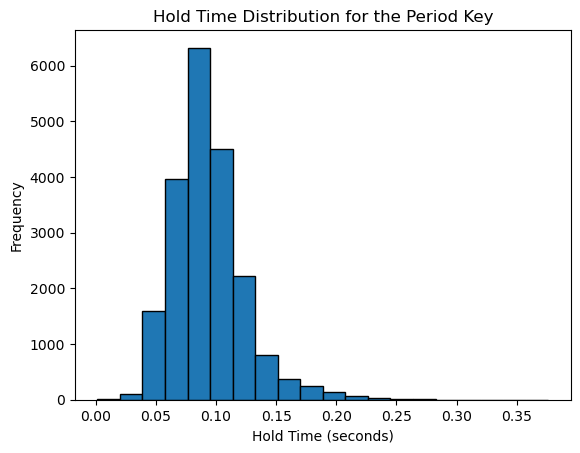

In [2]:
# Example: Histogram for hold time of the period key
import matplotlib.pyplot as plt

plt.hist(data['H.period'], bins=20, edgecolor='black')
plt.title('Hold Time Distribution for the Period Key')
plt.xlabel('Hold Time (seconds)')
plt.ylabel('Frequency')
plt.show()

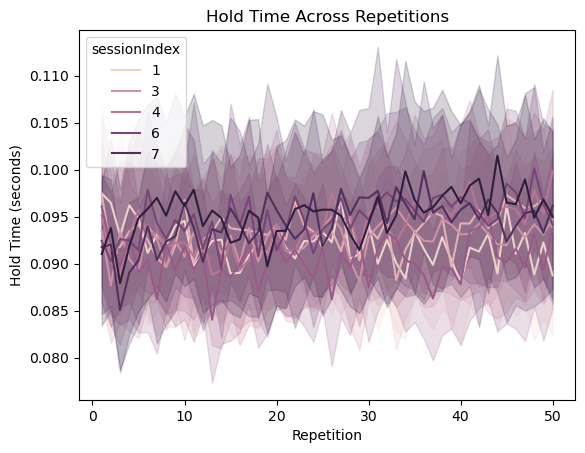

In [9]:
# Example: Line plot for hold time across repetitions
import seaborn as sns

sns.lineplot(x='rep', y='H.period', data=data, hue='sessionIndex')
plt.title('Hold Time Across Repetitions')
plt.xlabel('Repetition')
plt.ylabel('Hold Time (seconds)')
plt.show()

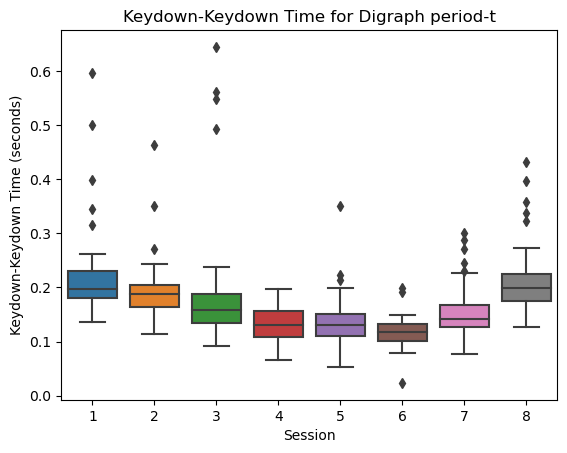

In [5]:
# Example: Box plot for keydown-keydown time of a specific digraph
sns.boxplot(x='sessionIndex', y='DD.period.t', data=data[data['subject']=='s002'])
plt.title('Keydown-Keydown Time for Digraph period-t')
plt.xlabel('Session')
plt.ylabel('Keydown-Keydown Time (seconds)')
plt.show()

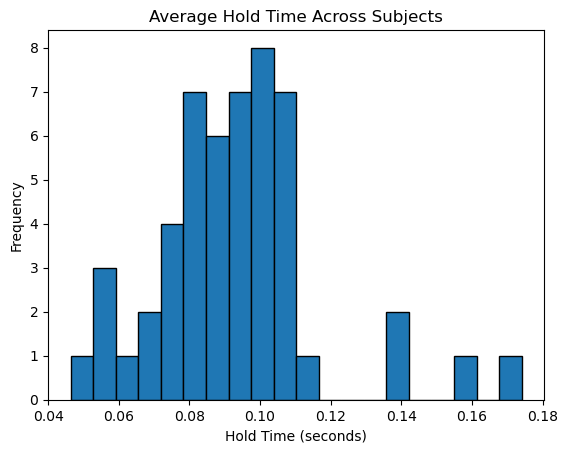

In [155]:
plt.hist(data.groupby('subject')['H.period'].mean(), bins=20, edgecolor='black')
plt.title('Average Hold Time Across Subjects')
plt.xlabel('Hold Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [158]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

subject_to_exclude = "s002"

X = data[data.columns[3:]]
y = data['subject']

X_without_subject = X[y != subject_to_exclude]
y_without_subject = y[y != subject_to_exclude]
X_subject = X[y == subject_to_exclude]
y_subject = y[y == subject_to_exclude]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_without_subject, y_without_subject, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [159]:
knc = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute', leaf_size=100, p=1, metric='manhattan', metric_params=None, n_jobs=None)
knc.fit(X_train_scaled, y_train)
knc_pred = knc.predict(X_test_scaled)
knc_accuracy = metrics.accuracy_score(y_test, knc_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.918


In [160]:
svc = svm.SVC(C=5.0, kernel='rbf', gamma='auto', coef0=0.0, shrinking=False, probability=True, tol=0.15, cache_size=500, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovo', break_ties=False, random_state=None)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)
svc_accuracy = metrics.accuracy_score(y_test, svc_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.9


In [161]:
mlpc = MLPClassifier(hidden_layer_sizes=(2000,), activation='relu', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlpc.fit(X_train_scaled,y_train)
mlpc_pred = mlpc.predict(X_test_scaled)
mlpc_accuracy = metrics.accuracy_score(y_test, mlpc_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.93475


In [164]:

X_subject_scaled = scaler.transform(X_subject)

knc_pred_subject_to_test = knc.predict(X_subject_scaled)
mlp_pred_subject_to_test = mlpc.predict(X_subject_scaled)
svc_pred_subject_to_test = svc.predict(X_subject_scaled)

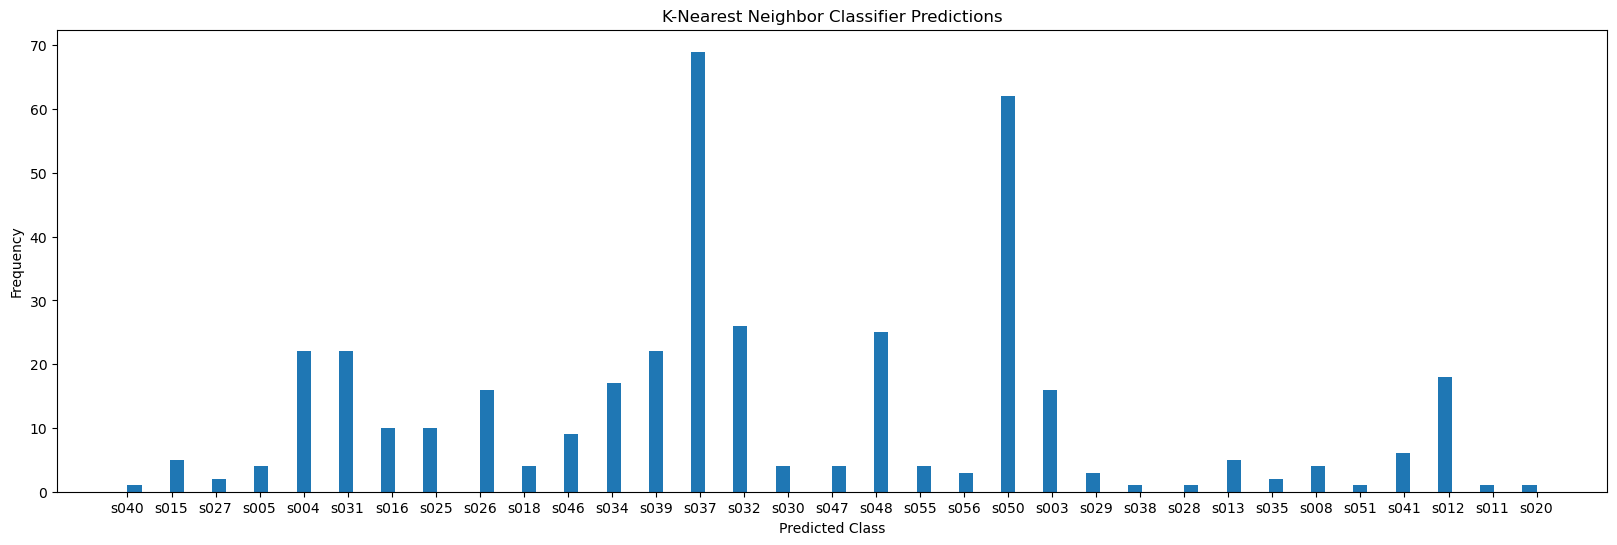

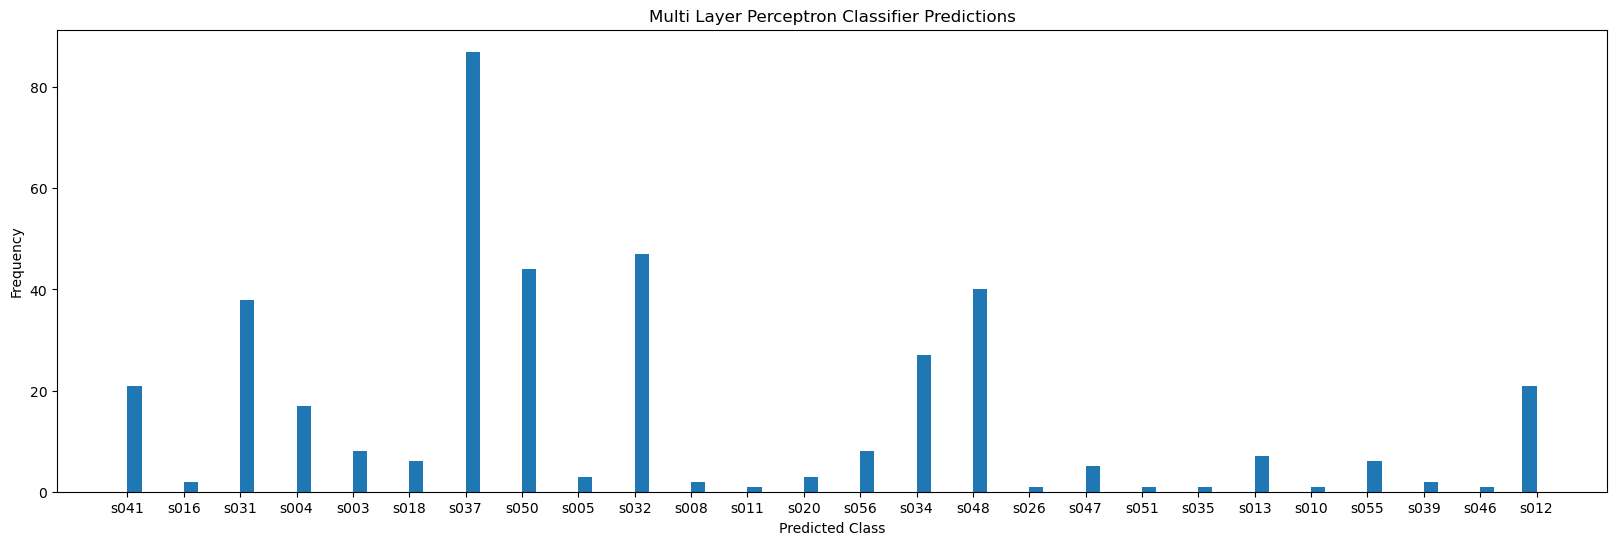

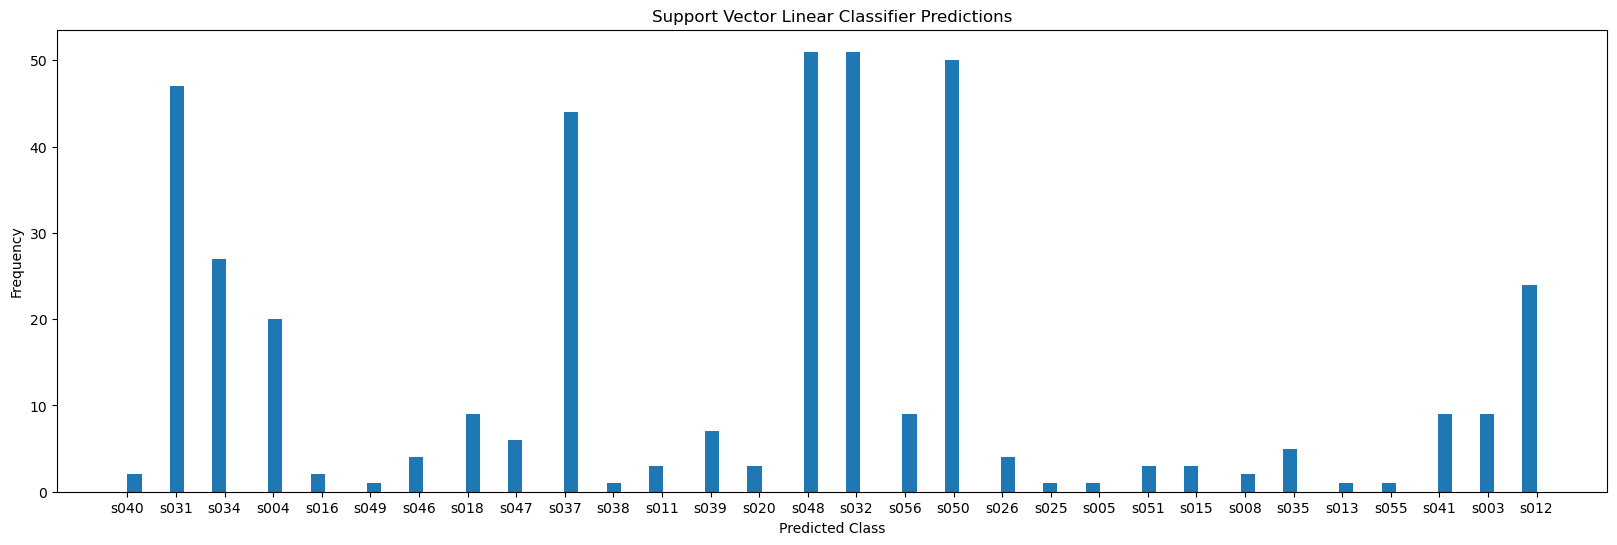

In [181]:
plt.figure(figsize=(20, 6))
plt.hist(knc_pred_subject_to_test,  bins = 100)
plt.title('K-Nearest Neighbor Classifier Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(mlp_pred_subject_to_test,  bins = 100)
plt.title('Multi Layer Perceptron Classifier Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(svc_pred_subject_to_test,  bins = 100)
plt.title('Support Vector Linear Classifier Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.show()